#Import semua library yang dibutuhkan

In [ ]:
import os
import cv2
import pandas as pd #Python Data Analysis Library
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#Selective import modul-modul Scikit Learn
#(Scikit Learn memiliki banyak modul machine learning)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Mengakses Dataset Freshwater Fish Disease Aquaculture in South Asia [link dataset](https://www.kaggle.com/datasets/subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia/data)

Menghubungkan ke google drive dimana dataset yang sudah di download saya masukkan ke dalam gdrive

In [ ]:
#menghubungkan dengan dataset yang sudah ada digdrive saya
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Mengestrak file Zip

In [ ]:
# from zipfile import ZipFile

In [ ]:
# with ZipFile("drive/MyDrive/Dataset/FishDiseaseAquaculture.zip") as zipObj:
  # zipObj.extractall('drive/MyDrive/Dataset/FishDiseaseAquaculture')

# Menyiapkan file untuk data gambar jenis-jenis penyakit ikan

In [ ]:
import os

# file direktori dengan gambar Bacterial Diseases - Aeromoniasis
train_BDA = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA')

# file direktori dengan gambar Bacterial Gill Disease
train_BGD = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BGD')

# file direktori dengan gambar Bacterial Red Disease
train_BRD = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BRD')

# file direktori dengan gambar Fungal Diseases Saprolegniasis
train_FDS = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/FDS')

# file direktori dengan gambar Healthy Fish
train_HF = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/HF')

# file direktori dengan gambar Parasitic Diseases
train_PD = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/PD')

# file direktori dengan gambar Viral Diseases White Tail disease
train_VDWT = os.path.join('drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/VDWT')

In [ ]:
import os

# Path utama dataset (Train dan Test)
train_path = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train'
test_path = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Test'

# Ekstensi file gambar yang valid
valid_extensions = ['.jpg', '.jpeg', '.png']

# Fungsi untuk memeriksa file valid dan invalid
def check_files_in_folder(folder_path):
    valid_files = []
    invalid_files = []

    # Iterasi semua file dalam folder
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            # Cek apakah file memiliki ekstensi valid
            if file_name.lower().endswith(tuple(valid_extensions)):
                valid_files.append(os.path.join(root, file_name))
            else:
                invalid_files.append(os.path.join(root, file_name))

    return valid_files, invalid_files

# Menjalankan fungsi untuk folder Train
print("Checking Train folder...\n")
valid_train_files, invalid_train_files = check_files_in_folder(train_path)

# Menjalankan fungsi untuk folder Test
print("\nChecking Test folder...\n")
valid_test_files, invalid_test_files = check_files_in_folder(test_path)

# Menampilkan hasil Train
print(f"Train folder - Total valid files: {len(valid_train_files)}")
print(f"Train folder - Total invalid files: {len(invalid_train_files)}\n")

if valid_train_files:
    print("Train folder - Valid files:")
    for file in valid_train_files:
        print(file)

if invalid_train_files:
    print("\nTrain folder - Invalid files:")
    for file in invalid_train_files:
        print(file)

# Menampilkan hasil Test
print(f"\nTest folder - Total valid files: {len(valid_test_files)}")
print(f"Test folder - Total invalid files: {len(invalid_test_files)}\n")

if valid_test_files:
    print("Test folder - Valid files:")
    for file in valid_test_files:
        print(file)

if invalid_test_files:
    print("\nTest folder - Invalid files:")
    for file in invalid_test_files:
        print(file)

Checking Train folder...


Checking Test folder...

Train folder - Total valid files: 1747
Train folder - Total invalid files: 0

Train folder - Valid files:
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (1).jpeg
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (1).jpg
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (1).png
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (10).jpg
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (100).jpg
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (101).jpg
drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (102

In [ ]:
# Mengkonversi gambar yang sebelumnya .webp menjadi .jpg, jpeg, atau .png
# !pip install pillow
from PIL import Image
import os

# Fungsi untuk mengonversi file .webp ke .jpg di folder tertentu
def convert_invalid_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.lower().endswith('.webp'):  # Hanya file dengan ekstensi .webp
                webp_file = os.path.join(root, file_name)
                jpg_file = os.path.splitext(webp_file)[0] + ".jpg"

                try:
                    # Membuka file .webp dan mengonversi ke .jpg
                    with Image.open(webp_file) as img:
                        img.convert("RGB").save(jpg_file, "JPEG")
                    print(f"Converted: {webp_file} -> {jpg_file}")

                    # Menghapus file .webp setelah konversi
                    os.remove(webp_file)
                    print(f"Deleted: {webp_file}")
                except Exception as e:
                    print(f"Failed to convert {webp_file}: {e}")

# Path ke folder Train dan Test
train_path = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train'
test_path = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Test'

# Menjalankan konversi di folder Train dan Test
print("Processing Train folder...")
convert_invalid_files(train_path)

print("\nProcessing Test folder...")
convert_invalid_files(test_path)

print("\nConversion completed!")

Processing Train folder...

Processing Test folder...

Conversion completed!


In [ ]:
# Fungsi untuk menghitung gambar dengan ekstensi yang valid
def count_images_in_folder(folder_path):
    valid_extensions = ['.jpg', '.jpeg', '.png']
    return len([f for f in os.listdir(folder_path) if os.path.splitext(f)[1].lower() in valid_extensions])

# Direktori folder training
train_BDA = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA'
train_BGD = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BGD'
train_BRD = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BRD'
train_FDS = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/FDS'
train_HF = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/HF'
train_PD = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/PD'
train_VDWT = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/VDWT'

# Menampilkan jumlah gambar di masing-masing folder
print('Total training gambar Bacterial Diseases - Aeromoniasis:', count_images_in_folder(train_BDA))
print('Total training gambar Bacterial Gill Disease:', count_images_in_folder(train_BGD))
print('Total training gambar Bacterial Red Disease:', count_images_in_folder(train_BRD))
print('Total training gambar Fungal Diseases Saprolegniasis:', count_images_in_folder(train_FDS))
print('Total training gambar Healthy Fish:', count_images_in_folder(train_HF))
print('Total training gambar Parasitic Diseases:', count_images_in_folder(train_PD))
print('Total training gambar Viral Diseases White Tail disease:', count_images_in_folder(train_VDWT))

Total training gambar Bacterial Diseases - Aeromoniasis: 250
Total training gambar Bacterial Gill Disease: 250
Total training gambar Bacterial Red Disease: 250
Total training gambar Fungal Diseases Saprolegniasis: 250
Total training gambar Healthy Fish: 250
Total training gambar Parasitic Diseases: 250
Total training gambar Viral Diseases White Tail disease: 247


In [ ]:
train_BDA_names = os.listdir(train_BDA)
train_BGD_names = os.listdir(train_BGD)
train_BRD_names = os.listdir(train_BRD)
train_FDS_names = os.listdir(train_FDS)
train_HF_names = os.listdir(train_HF)
train_PD_names = os.listdir(train_PD)
train_VDWT_names = os.listdir(train_VDWT)

#Menampilkan gambar ikan dengan jenis Bacterial Diseases - Aeromoniasis, Bacterial Gill Disease, Bacterial Red Disease, Fungal Diseases Saprolegniasis, Healthy Fish, Parasitic Diseases, dan Viral Diseases White Tail diseases

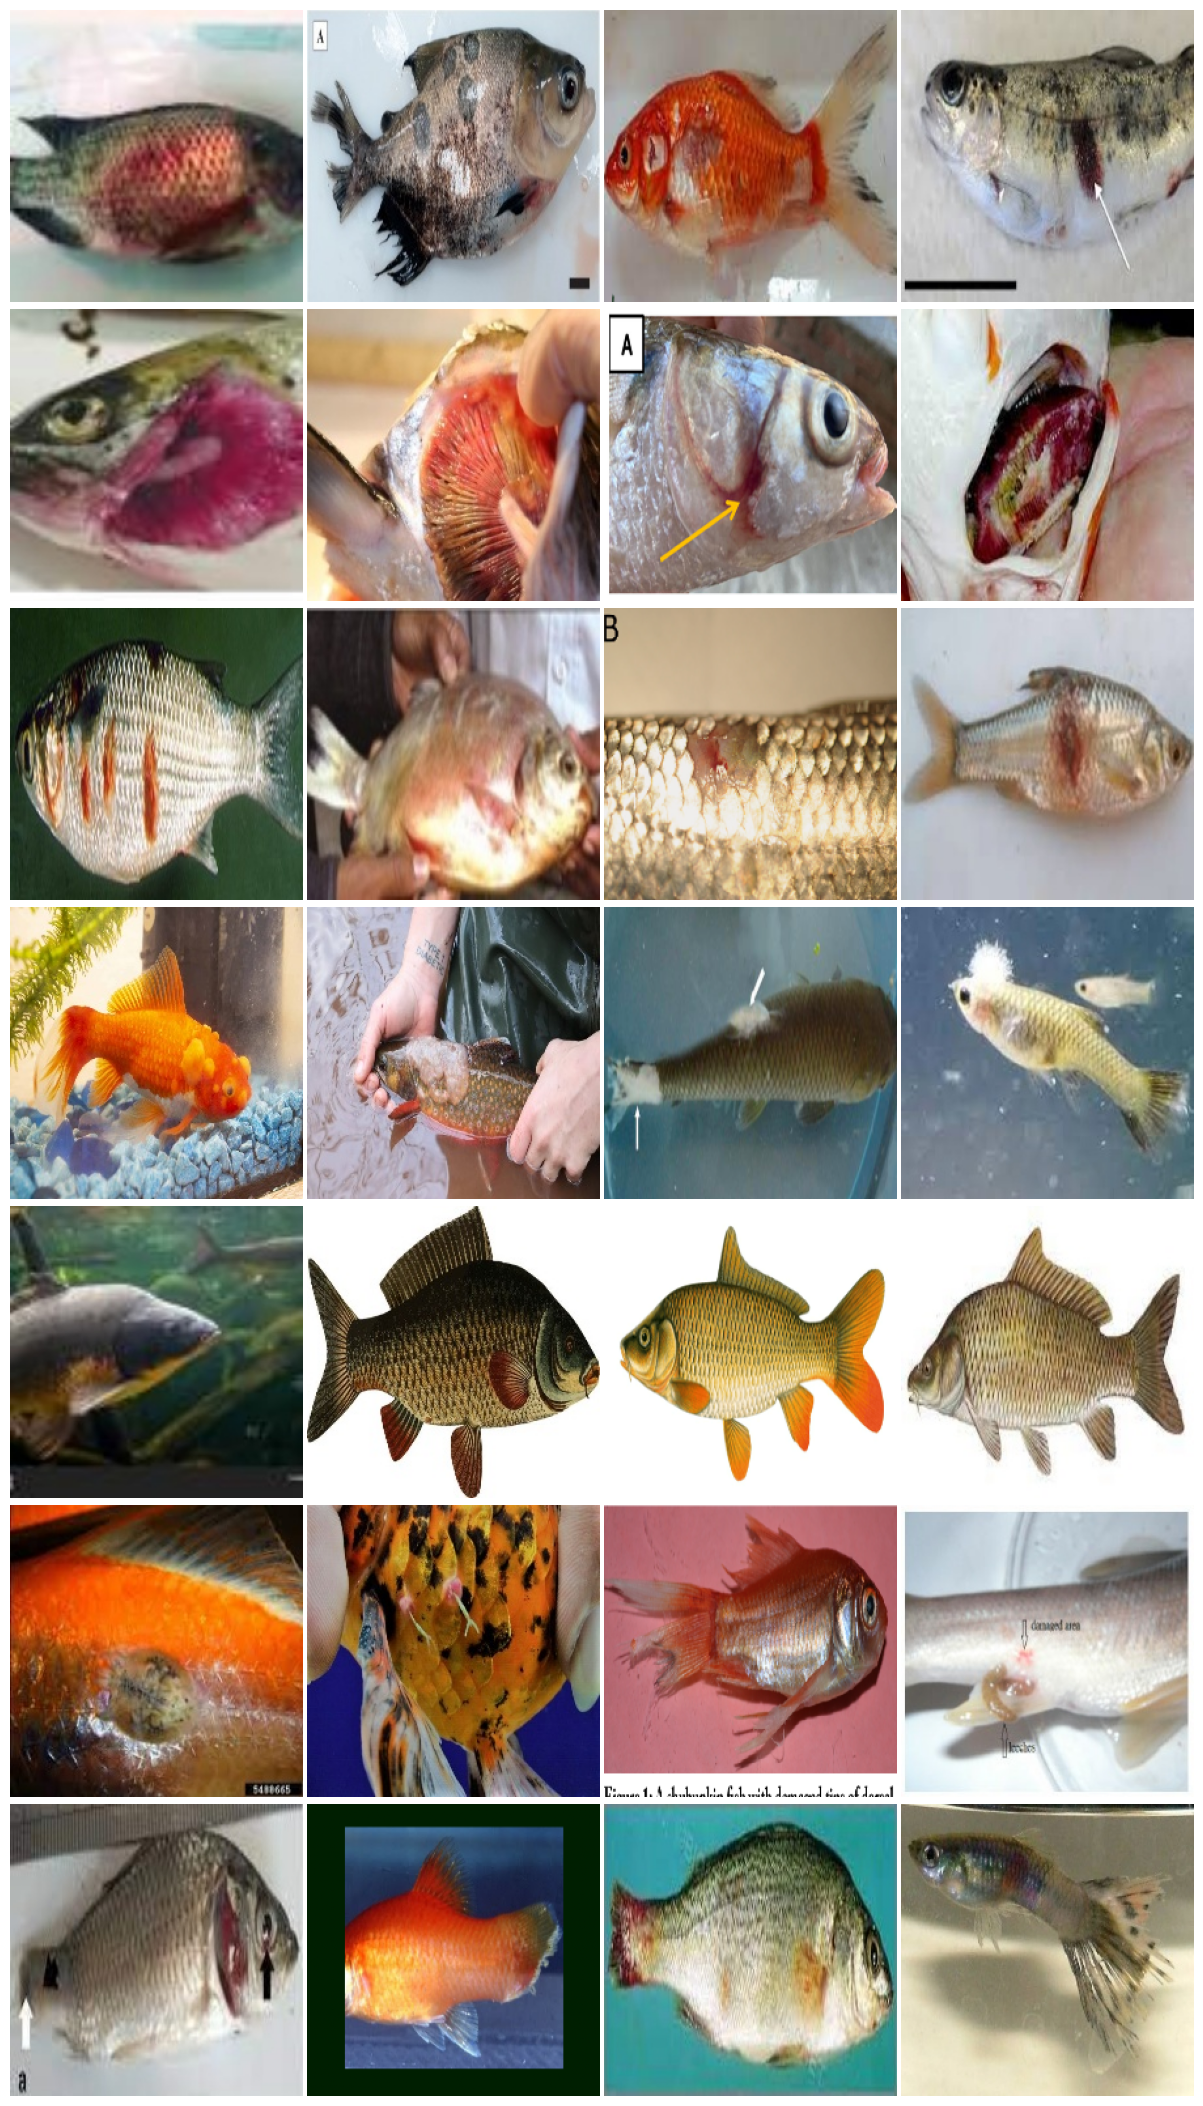

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Jumlah baris dan kolom tampilan gambar
nrows = 7
ncols = 4

# Index awal untuk iterasi gambar
pic_index = 0

# Mengatur ukuran gambar output matplotlib agar lebih kecil
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)  # Sesuaikan ukuran figure untuk jarak yang lebih kecil

# Update pic_index untuk menampilkan gambar batch pertama
pic_index += 4

# Menyusun daftar gambar per kelas
gbr_tampil_BDA  = [os.path.join(train_BDA, fname) for fname in train_BDA_names[pic_index-4:pic_index]]
gbr_tampil_BGD = [os.path.join(train_BGD, fname) for fname in train_BGD_names[pic_index-4:pic_index]]
gbr_tampil_BRD = [os.path.join(train_BRD, fname) for fname in train_BRD_names[pic_index-4:pic_index]]
gbr_tampil_FDS  = [os.path.join(train_FDS, fname) for fname in train_FDS_names[pic_index-4:pic_index]]
gbr_tampil_HF = [os.path.join(train_HF, fname) for fname in train_HF_names[pic_index-4:pic_index]]
gbr_tampil_PD = [os.path.join(train_PD, fname) for fname in train_PD_names[pic_index-4:pic_index]]
gbr_tampil_VDWT  = [os.path.join(train_VDWT, fname) for fname in train_VDWT_names[pic_index-4:pic_index]]

# Menampilkan gambar
all_images = gbr_tampil_BDA + gbr_tampil_BGD + gbr_tampil_BRD + gbr_tampil_FDS + gbr_tampil_HF + gbr_tampil_PD + gbr_tampil_VDWT

# Menampilkan gambar dalam grid
for i, img_path in enumerate(all_images):
    # Mengatur subplot; indeks subplot dimulai dari 1
    sp = plt.subplot(nrows, ncols, i + 1)
    # Tidak menampilkan Gridlines
    sp.axis('Off')

    # Membaca dan menampilkan gambar
    img = mpimg.imread(img_path)
    plt.imshow(img)

# Menyesuaikan jarak antar gambar
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Menurunkan nilai wspace dan hspace untuk jarak lebih dekat

# Mengatur layout agar lebih rapat
plt.tight_layout(pad=0.5)

# Menyimpan output gambar ke file (misalnya dalam format PNG)
output_filename = 'tampilan_gambar.png'  # Ganti dengan lokasi yang diinginkan
plt.savefig(output_filename, bbox_inches='tight')  # Simpan gambar dengan mengabaikan padding

# Menampilkan gambar
plt.show()

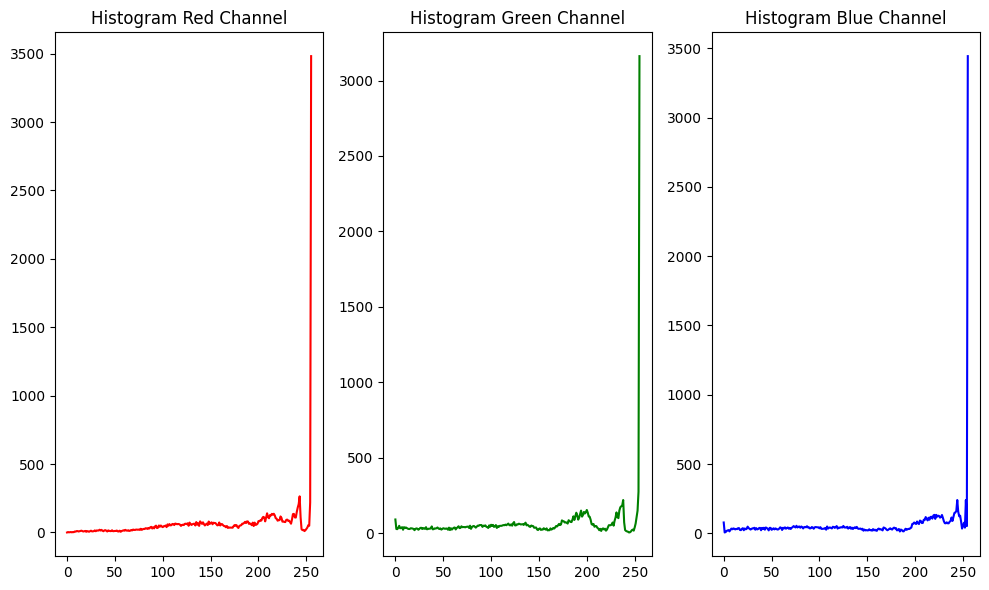

Fitur Warna Gambar:
{'red_mean': 64.0, 'green_mean': 64.0, 'blue_mean': 64.0, 'red_std': 217.70898, 'green_std': 197.42241, 'blue_std': 214.4559}


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_features(image_path):
    # Membaca gambar menggunakan OpenCV
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengkonversi dari BGR ke RGB

    # Ekstraksi histogram untuk setiap channel RGB
    red_hist = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])  # Red channel
    green_hist = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])  # Green channel
    blue_hist = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])  # Blue channel

    # Visualisasi histogram
    plt.figure(figsize=(10, 6))

    plt.subplot(131)
    plt.plot(red_hist, color='red')
    plt.title("Histogram Red Channel")

    plt.subplot(132)
    plt.plot(green_hist, color='green')
    plt.title("Histogram Green Channel")

    plt.subplot(133)
    plt.plot(blue_hist, color='blue')
    plt.title("Histogram Blue Channel")

    plt.tight_layout()
    plt.show()

    # Mengambil fitur statistik dari histogram (mean dan standar deviasi)
    red_mean = np.mean(red_hist)
    green_mean = np.mean(green_hist)
    blue_mean = np.mean(blue_hist)

    red_std = np.std(red_hist)
    green_std = np.std(green_hist)
    blue_std = np.std(blue_hist)

    # Mengembalikan fitur yang diekstraksi
    return {'red_mean': red_mean, 'green_mean': green_mean, 'blue_mean': blue_mean,
            'red_std': red_std, 'green_std': green_std, 'blue_std': blue_std}

# Contoh pemanggilan untuk satu gambar (gunakan gambar dari folder yang sudah dipilih)
image_path = '/content/drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (153).jpg'  # Ganti dengan gambar yang valid

features = extract_color_features(image_path)

# Menampilkan hasil fitur warna
print("Fitur Warna Gambar:")
print(features)

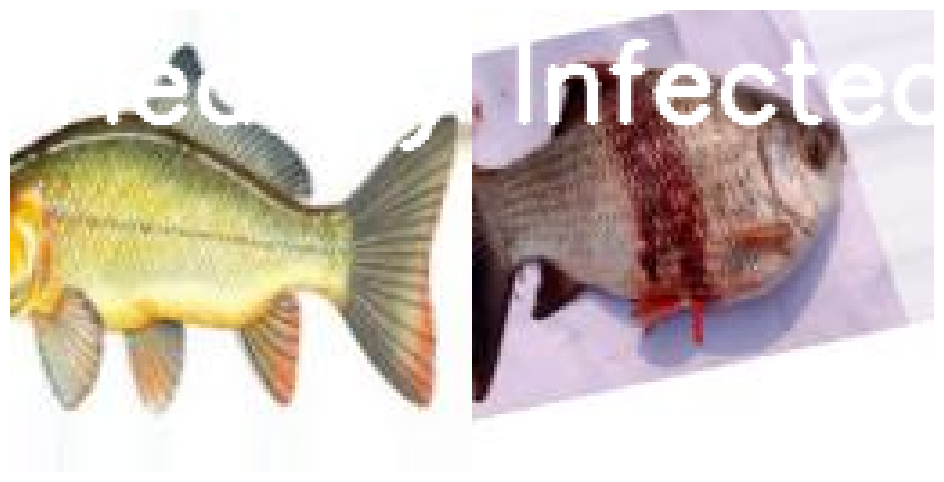

Gambar gabungan disimpan di: Combined_Fish_Analysis_with_Title.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung kecerahan (Brightness)
def calculate_brightness(image):
    return np.mean(image)

# Fungsi untuk menghitung kontras (Contrast)
def calculate_contrast(image):
    return np.std(image)

# Fungsi untuk menambahkan title pada gambar
def add_title_to_image(image, title):
    # Menambahkan teks ke gambar menggunakan OpenCV
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Menambahkan title di sudut kiri atas
    cv2.putText(image, title, (10, 30), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return image

# Fungsi untuk menampilkan gambar dan hasil analisis kecerahan dan kontras
def display_image_and_analysis(image_paths, titles, output_path):
    images_with_titles = []

    # Membaca setiap gambar dan menganalisisnya
    for image_path, title in zip(image_paths, titles):
        # Membaca gambar
        image = cv2.imread(image_path)

        # Cek apakah gambar berhasil dimuat
        if image is None:
            print(f"Error: Could not load image at path: {image_path}")
            continue

        # Menghitung kecerahan dan kontras
        brightness = calculate_brightness(image)
        contrast = calculate_contrast(image)

        # Menambahkan title dengan hasil analisis pada gambar
        title_with_analysis = f"{title}\nBrightness: {brightness:.2f}, Contrast: {contrast:.2f}"

        # Menambahkan title ke gambar
        image_with_title = add_title_to_image(image, title_with_analysis)

        # Menambahkan gambar yang sudah diberi title ke list
        images_with_titles.append(image_with_title)

    # Menggabungkan gambar dalam satu gambar besar secara horizontal
    if len(images_with_titles) > 0:
        # Menggabungkan gambar-gambar yang sudah diberi title
        combined_image = np.hstack(images_with_titles)  # Horizontal stacking
    else:
        print("No images to combine.")
        return

    # Menampilkan gambar gabungan
    combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(combined_image_rgb)
    plt.axis('off')  # Menyembunyikan axis
    plt.show()

    # Menyimpan gambar gabungan ke output_path
    combined_image_bgr = cv2.cvtColor(combined_image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, combined_image_bgr)
    print(f"Gambar gabungan disimpan di: {output_path}")

# Path gambar ikan sehat dan terinfeksi
healthy_fish_image_path = '/content/drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/HF/Healthy Fish (226).jpg'
infected_fish_image_path = '/content/drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (153).jpg'

# Tentukan path untuk menyimpan gambar gabungan hasil analisis
output_combined_image_path = 'Combined_Fish_Analysis_with_Title.jpg'

# Menampilkan gambar dan analisis kecerahan serta kontras untuk ikan sehat dan terinfeksi dalam satu gambar gabungan
display_image_and_analysis([healthy_fish_image_path, infected_fish_image_path],
                           ['Healthy Fish', 'Infected Fish'],
                           output_combined_image_path)

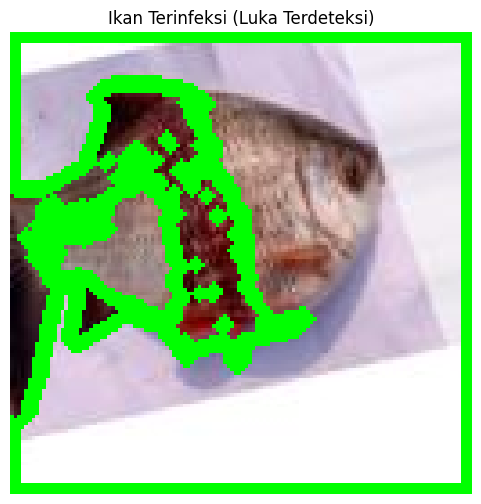

Gambar hasil deteksi disimpan di: Infection_fish_result.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi ikan sehat berdasarkan warna dan kontras yang seragam
def detect_healthy_fish(image):
    # Mengubah gambar ke grayscale (skala abu-abu)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Menggunakan thresholding untuk memisahkan area yang terang dan gelap
    _, threshold_image = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

    # Mencari kontur dalam gambar
    contours, _ = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Jika tidak ada kontur yang ditemukan atau kontur terlalu kecil, anggap gambar sehat
    is_healthy = len(contours) == 0

    # Menggambar kontur pada gambar asli untuk visualisasi
    image_with_contours = image.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 3)

    return is_healthy, image_with_contours

# Fungsi untuk menampilkan hasil deteksi ikan sehat dan menyimpan gambar hasil deteksi
def display_healthy_result_and_save(image_path, output_path):
    # Memuat gambar
    image = cv2.imread(image_path)

    # Cek jika gambar berhasil dimuat
    if image is None:
        print(f"Error: Gambar tidak ditemukan pada path: {image_path}")
        return

    # Deteksi apakah ikan sehat atau tidak
    is_healthy, image_with_contours = detect_healthy_fish(image)

    # Menampilkan hasil deteksi
    plt.figure(figsize=(6, 6))
    if is_healthy:
        title = "Ikan Sehat (Tidak Ada Luka)"
    else:
        title = "Ikan Terinfeksi (Luka Terdeteksi)"

    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

    # Menyimpan gambar hasil deteksi
    cv2.imwrite(output_path, image_with_contours)  # Menyimpan gambar dengan kontur yang digambar

# Path gambar ikan untuk diuji
image_path = '/content/drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train/BDA/Bacterial diseases - Aeromoniasis (153).jpg'

# Path untuk menyimpan gambar hasil deteksi
output_image_path = 'Infection_fish_result.png'

# Menampilkan hasil deteksi ikan sehat dan menyimpan gambar
display_healthy_result_and_save(image_path, output_image_path)

print(f"Gambar hasil deteksi disimpan di: {output_image_path}")

#Split dataset untuk proses lebih lanjut

In [ ]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Path ke folder Train dan Test
train_dir = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train'
test_dir = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Test'

In [ ]:
# Fungsi untuk memuat gambar dan label
def load_data(data_dir, img_size=(128, 128)):
    data = []
    labels = []
    for folder in os.listdir(data_dir):  # Setiap kategori
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):  # Pastikan itu folder
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:  # Pastikan gambar valid
                    img = cv2.resize(img, img_size)  # Resize
                    data.append(img)
                    labels.append(folder)  # Nama folder sebagai label
    return np.array(data), np.array(labels)

In [ ]:
# Load data Train dan Test
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

In [ ]:
# Normalisasi nilai piksel
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Encode Label
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# One-hot encoding untuk CNN
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

In [ ]:
# Print ukuran data
print(f"Data train: {X_train.shape}, Labels train: {y_train.shape}")
print(f"Data test: {X_test.shape}, Labels test: {y_test.shape}")

Data train: (1747, 128, 128, 3), Labels train: (1747,)
Data test: (697, 128, 128, 3), Labels test: (697,)


#Model CNN

In [ ]:
#Mengimpor modul tensorflow
import tensorflow as tf

#Membentuk model sequential dan membentuk input adalah gambar dengan ukuran 128x128 dengan 3 byte warna
model = tf.keras.models.Sequential([

    #Layer Konvolusi pertama
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    #Layer Konvolusi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Layer Konvolusi ketiga
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    #Hiden layer pertama dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),

    #Hiden layer kedua dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),

    #Layer output
    # Changed the number of output neurons to match the number of classes in y_train_one_hot (7)
    tf.keras.layers.Dense(7, activation='softmax')
])

# Define optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Menampilkan summary model
model.summary()
model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,492,359 (13.32 MB)

 Trainable params: 3,492,359 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
class_weights = {0: 1., 1: 1., 2: 1., 3: 1., 4: 5., 5: 1., 6: 1.}  # Contoh memberi bobot lebih besar pada kelas HF
history = model.fit(
    X_train, y_train_one_hot,
    validation_data=(X_test, y_test_one_hot),
    epochs=20,
    batch_size=32,
    class_weight=class_weights
)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 558ms/step - accuracy: 0.1514 - loss: 2.7824 - val_accuracy: 0.1535 - val_loss: 1.9670
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 534ms/step - accuracy: 0.1692 - loss: 2.5173 - val_accuracy: 0.2109 - val_loss: 2.1545
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 513ms/step - accuracy: 0.2221 - loss: 2.3000 - val_accuracy: 0.3372 - val_loss: 1.7707
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 528ms/step - accuracy: 0.3522 - loss: 2.0042 - val_accuracy: 0.4505 - val_loss: 1.4511
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 518ms/step - accuracy: 0.4278 - loss: 1.7533 - val_accuracy: 0.4706 - val_loss: 1.4920
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 499ms/step - accuracy: 0.5242 - loss: 1.4677 - val_accuracy: 0.6700 - val_loss: 0.9106
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 528ms/step - accuracy: 0.6434 - loss: 1.1687 - val_accuracy: 0.7547 - val_loss: 0.6854
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 535ms/step - accuracy: 0.7311 - loss: 0.8312 - val_accu

#Evaluasi CNN

In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report

test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.9927 - loss: 0.0203
Test Loss: 0.012262079864740372, Test Accuracy: 0.9971305727958679


In [ ]:
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)

# Menghasilkan laporan klasifikasi
report = classification_report(
    y_test_encoded,
    y_pred_cnn,
    target_names=label_encoder.classes_,
    output_dict=True  # Hasilkan output dalam bentuk dictionary
)

# Menampilkan laporan klasifikasi
for class_name, metrics in report.items():
    if isinstance(metrics, dict):  # Hanya menampilkan metrik untuk kelas
        print(f"Class '{class_name}':")
        print(f"  Precision: {metrics['precision']:.2f}")
        print(f"  Recall:    {metrics['recall']:.2f}")
        print(f"  F1-Score:  {metrics['f1-score']:.2f}")
        print(f"  Support:   {metrics['support']:.0f}\n")

# Jika ingin menyimpan laporan dalam DataFrame untuk analisis lebih lanjut:
report_df = pd.DataFrame(report).transpose()
print("\nLaporan Evaluasi Model CNN:")
print(report_df)

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step
Class 'BDA':
  Precision: 1.00
  Recall:    0.99
  F1-Score:  0.99
  Support:   100

Class 'BGD':
  Precision: 1.00
  Recall:    0.99
  F1-Score:  0.99
  Support:   100

Class 'BRD':
  Precision: 0.99
  Recall:    1.00
  F1-Score:  1.00
  Support:   100

Class 'FDS':
  Precision: 0.99
  Recall:    1.00
  F1-Score:  1.00
  Support:   100

Class 'HF':
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  Support:   100

Class 'PD':
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  Support:   100

Class 'VDWT':
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  Support:   97

Class 'macro avg':
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  Support:   697

Class 'weighted avg':
  Precision: 1.00
  Recall:    1.00
  F1-Score:  1.00
  Support:   697


Laporan Evaluasi Model CNN:
              precision    recall  f1-score     support
BDA            1.000000  0.990000  0.994975  100.000000
BGD            1.000000  0.990000  0.994

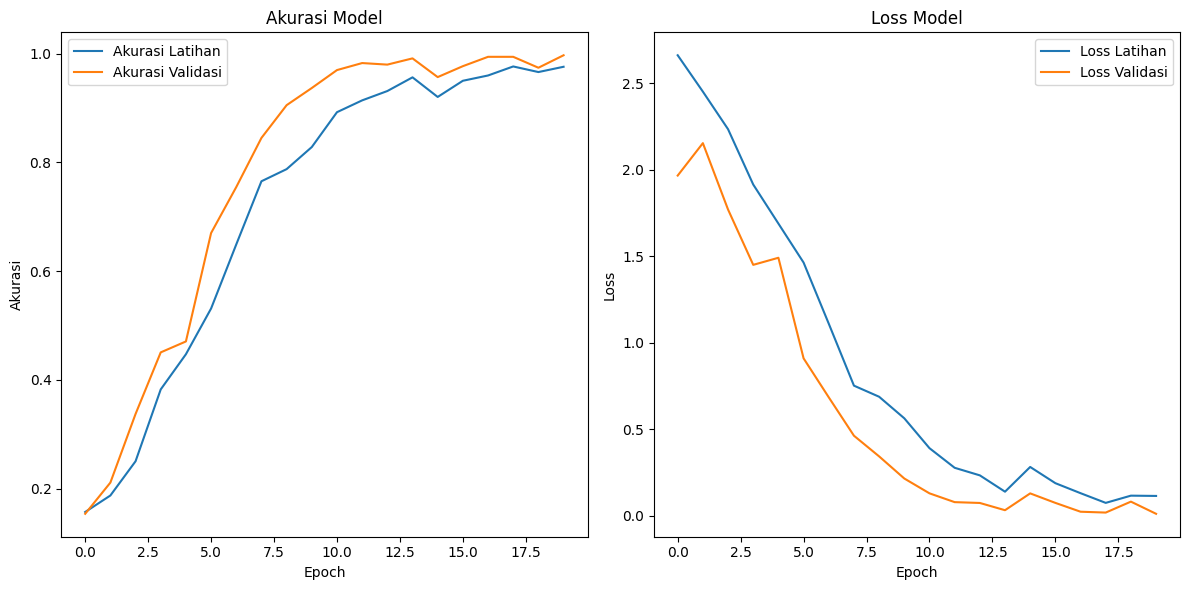

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Latihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Visualisasi loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Latihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('VisualisasiAkurasidanLoss.jpg')
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step
Confusion Matrix CNN disimpan di ConfusionMatrix_CNN.png


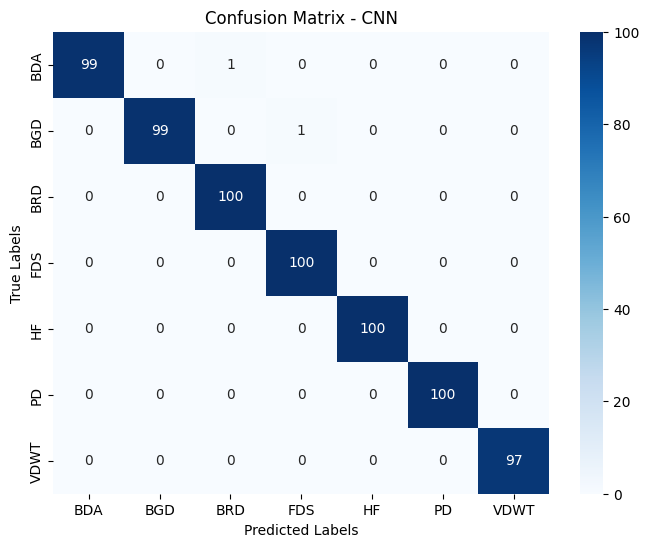

Laporan Klasifikasi CNN:
              precision    recall  f1-score   support

         BDA       1.00      0.99      0.99       100
         BGD       1.00      0.99      0.99       100
         BRD       0.99      1.00      1.00       100
         FDS       0.99      1.00      1.00       100
          HF       1.00      1.00      1.00       100
          PD       1.00      1.00      1.00       100
        VDWT       1.00      1.00      1.00        97

    accuracy                           1.00       697
   macro avg       1.00      1.00      1.00       697
weighted avg       1.00      1.00      1.00       697



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import numpy as np

# Prediksi pada data uji menggunakan model CNN
y_pred_cnn = model.predict(X_test)

# Konversi prediksi menjadi label dengan mengambil argmax
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

# Konversi label asli (y_test_one_hot) menjadi label integer
y_true_labels_cnn = np.argmax(y_test_one_hot, axis=1)

# Menghitung Confusion Matrix
cm_cnn = confusion_matrix(y_true_labels_cnn, y_pred_labels_cnn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menyimpan gambar confusion matrix CNN sebagai file .png
conf_matrix_cnn_path = 'ConfusionMatrix_CNN.png'
plt.savefig(conf_matrix_cnn_path)
print(f'Confusion Matrix CNN disimpan di {conf_matrix_cnn_path}')

# Menampilkan gambar
plt.savefig('ConfusionMatrix_CNN.png')
plt.show()

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi CNN:")
print(classification_report(y_true_labels_cnn, y_pred_labels_cnn, target_names=label_encoder.classes_))

#Visualisasi

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    import cv2
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Gambar tidak ditemukan di path: {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi ke RGB
    image = cv2.resize(image, target_size)  # Resize ke ukuran target
    image = np.expand_dims(image, axis=0)  # Tambahkan dimensi batch
    image = image / 255.0  # Normalisasi ke rentang [0, 1]
    return image

# Fungsi untuk visualisasi aktivasi
def visualize_activations(model, img_array, save_dir='activations'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Identifikasi layer konvolusi dalam model
    conv_layers = [layer for layer in model.layers if isinstance(layer, Conv2D)]
    if not conv_layers:
        print("Model tidak memiliki lapisan konvolusi.")
        return

    # Model aktivasi
    layer_outputs = [layer.output for layer in conv_layers]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Ekstrak aktivasi dari gambar input
    try:
        activations = activation_model(img_array)  # Panggil model dengan input langsung
    except Exception as e:
        print(f"Error saat memprediksi aktivasi: {e}")
        return

    # Visualisasi setiap layer
    for i, activation in enumerate(activations):
        layer_name = conv_layers[i].name
        n_features = activation.shape[-1]  # Jumlah fitur
        size = activation.shape[1]  # Ukuran spatial

        # Grid untuk visualisasi
        n_cols = min(16, n_features)  # Maksimal 16 fitur per baris
        n_rows = np.ceil(n_features / n_cols).astype(int)
        display_grid = np.zeros((n_rows * size, n_cols * size))

        # Normalisasi dan masukkan ke grid
        for col in range(n_cols):
            for row in range(n_rows):
                feature_index = col + row * n_cols
                if feature_index < n_features:
                    feature_map = activation[0, :, :, feature_index]
                    feature_map -= feature_map.mean()
                    feature_map /= (feature_map.std() + 1e-5)
                    feature_map = np.clip(feature_map, 0, 1)
                    display_grid[
                        row * size:(row + 1) * size,
                        col * size:(col + 1) * size
                    ] = feature_map

        # Tampilkan dan simpan hasil
        plt.figure(figsize=(15, 15))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.title(f"Layer {layer_name} Activation")
        plt.axis('off')

        save_path = os.path.join(save_dir, f"{layer_name}.png")
        plt.savefig(save_path)
        print(f"Saved activation visualization for {layer_name} to {save_path}")
        plt.show()

# Model path dan input gambar
model_path = 'cnn_model.h5'
image_path = 'BDA.jpeg'

# Memuat model
from tensorflow.keras.models import load_model
model = load_model(model_path)

# Input gambar dengan ukuran yang benar
img_array = load_and_preprocess_image(image_path)

# Panggil model dengan input
_ = model(img_array)  # Pastikan layer aktif dengan memanggil model

# Visualisasi aktivasi
visualize_activations(model, img_array)

FileNotFoundError: Gambar tidak ditemukan di path: BDA.jpeg

#SVM berbasis fitur warna

In [ ]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import os
import matplotlib.pyplot as plt

Menyiapkan Fungsi untuk Ekstraksi Warna

In [ ]:
# Fungsi untuk mengekstrak fitur warna (color histogram)
def extract_color_features(image, bins=(8, 8, 8)):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image_rgb], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    hist = hist.flatten()
    hist = hist / np.sum(hist)
    return hist

# Fungsi untuk menampilkan histogram warna
def plot_color_histogram(image, save_path=None):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.title('Histogram Warna')
    plt.xlabel('Intensitas Pixel')
    plt.ylabel('Jumlah Pixel')
    if save_path:
        plt.savefig('save_pathSVM.jpg')
    plt.close()

In [ ]:
# Fungsi untuk memuat data dari direktori
def load_data(data_dir, img_size=(128, 128), bins=(8, 8, 8)):
    features = []
    labels = []
    for folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    features.append(extract_color_features(img, bins))
                    labels.append(folder)
    return np.array(features), np.array(labels)

In [ ]:
# Fungsi untuk menyimpan fitur warna sebagai gambar
def save_color_features(image, features, save_path):
    feature_image = features.reshape((8, 8, 8)).sum(axis=0)
    plt.imshow(feature_image, cmap='hot')
    plt.title('Fitur Warna (Color Features)')
    plt.colorbar()
    plt.savefig('save_pathSVM2.jpg')
    plt.close()

In [ ]:
# Path ke folder Train dan Test
train_dir = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Train'
test_dir = 'drive/MyDrive/Dataset/FishDiseaseAquaculture/FishDiseaseAquaculture/Test'

# Main program
if __name__ == "__main__":
    # Muat gambar (gunakan path gambar yang sesuai)
    image_path = 'BDA.jpeg'  # Ganti dengan path gambar ikan
    output_dir = './output'  # Direktori untuk menyimpan hasil
    os.makedirs(output_dir, exist_ok=True)

    image = cv2.imread(image_path)

    if image is None:
        print(f"Gambar tidak ditemukan di {image_path}")
    else:
        # Tampilkan histogram warna dan simpan sebagai .png
        histogram_path = os.path.join(output_dir, 'color_histogram.png')
        plot_color_histogram(image, save_path=histogram_path)
        print(f"Histogram warna disimpan di {histogram_path}")

        # Ekstraksi fitur warna dan simpan sebagai .png
        color_features = extract_color_features(image)
        feature_image_path = os.path.join(output_dir, 'color_features.png')
        save_color_features(image, color_features, save_path=feature_image_path)
        print(f"Fitur warna disimpan di {feature_image_path}")

    # Load data untuk training dan testing
    X_train, y_train = load_data(train_dir)
    X_test, y_test = load_data(test_dir)

    # Encode label
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Normalisasi data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Melatih SVM
    svm_classifier = SVC(kernel='rbf', C=1.0)
    svm_classifier.fit(X_train_scaled, y_train_encoded)

    # Prediksi
    y_pred = svm_classifier.predict(X_test_scaled)

    # Evaluasi
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

Histogram warna disimpan di ./output/color_histogram.png
Fitur warna disimpan di ./output/color_features.png
Accuracy: 0.8020086083213773
              precision    recall  f1-score   support

         BDA       0.63      0.88      0.74       100
         BGD       0.92      0.84      0.88       100
         BRD       0.89      0.72      0.80       100
         FDS       0.92      0.79      0.85       100
          HF       0.61      0.86      0.71       100
          PD       0.99      0.80      0.88       100
        VDWT       0.90      0.72      0.80        97

    accuracy                           0.80       697
   macro avg       0.84      0.80      0.81       697
weighted avg       0.84      0.80      0.81       697



Confusion Matrix disimpan di ConfusionMatrixSVM.png


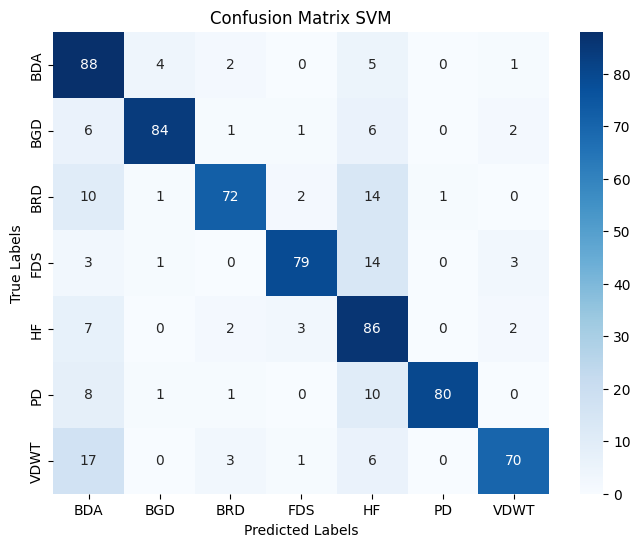

Laporan Klasifikasi:
              precision    recall  f1-score   support

         BDA       0.63      0.88      0.74       100
         BGD       0.92      0.84      0.88       100
         BRD       0.89      0.72      0.80       100
         FDS       0.92      0.79      0.85       100
          HF       0.61      0.86      0.71       100
          PD       0.99      0.80      0.88       100
        VDWT       0.90      0.72      0.80        97

    accuracy                           0.80       697
   macro avg       0.84      0.80      0.81       697
weighted avg       0.84      0.80      0.81       697



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Menghitung Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menyimpan gambar confusion matrix sebagai file .png
conf_matrix_path = 'ConfusionMatrixSVM.png'
plt.savefig(conf_matrix_path)
print(f'Confusion Matrix disimpan di {conf_matrix_path}')

# Menampilkan gambar
plt.show()

# Menampilkan laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

#Uji Coba model Klasifikasi Gambar Penyakit Ikan Bacterial Diseases - Aeromoniasis, Bacterial Gill Disease, Bacterial Red Disease, Fungal Diseases Saprolegniasis, Healthy Fish, Parasitic Diseases, dan Viral Diseases White Tail diseases

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar ikan tersebut merupakan ikan terjangkit Bacterial Diseases Aeromoniasis, Bacterial Gill Disease, Bacterial Red Disease, Fungal Diseases Saprolegniasis, Healthy Fish, Parasitic Diseases, atau Viral Diseases White Tail Diseases.

Saving Parasitic diseases (7).jpeg to Parasitic diseases (7).jpeg


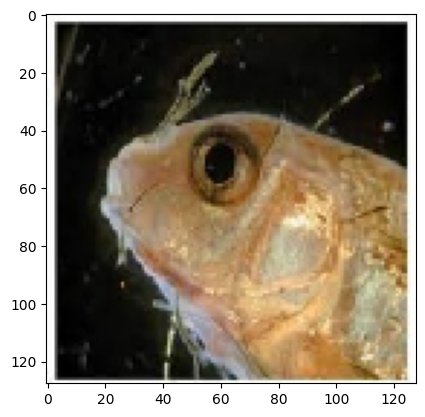

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Parasitic diseases (7).jpeg
Ikan ini terjangkit Parasitic Diseases


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import keras.utils as image
import tensorflow as tf
import matplotlib.pyplot as plt

# Memuat model yang telah disimpan
model = tf.keras.models.load_model('cnn_model.h5')

# Mengunggah gambar yang akan dikenali model
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    # Mengubah ukuran gambar menjadi 128x128 piksel
    img = image.load_img(path, target_size=(128, 128))

    # Menampilkan gambar yang diunggah
    imgplot = plt.imshow(img)
    plt.show()

    # Mengubah gambar menjadi array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    # Memprediksi kelas gambar
    classes = model.predict(images, batch_size=10)

    print(fn)
    # Menampilkan hasil prediksi sesuai kelas
    if classes[0][0] == 1:
        print('Ikan ini terjangkit Bacterial Diseases - Aeromoniasis')
    elif classes[0][1] == 1:
        print('Ikan ini terjangkit Bacterial Gill Disease')
    elif classes[0][2] == 1:
        print('Ikan ini terjangkit Bacterial Red Disease')
    elif classes[0][3] == 1:
        print('Ikan ini terjangkit Fungal Diseases Saprolegniasis')
    elif classes[0][4] == 1:
        print('Ikan ini Sehat')
    elif classes[0][5] == 1:
        print('Ikan ini terjangkit Parasitic Diseases')
    elif classes[0][6] == 1:
        print('Ikan ini terjangkit Viral Diseases White Tail Diseases')
    else:
        print('Tidak Diketahui')